### Installing libs

In [2]:
# ! pip install transformers
# ! pip3 install torch torchvision torchaudio
# ! pip install matplotlib 
import matplotlib.pyplot as plt

In [3]:
from transformers import GPT2LMHeadModel
model_hf=GPT2LMHeadModel.from_pretrained("gpt2")

c:\Users\Wail.EL-BANI\AppData\Local\anaconda3\envs\cv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sd_hf=model_hf.state_dict()

In [5]:
for k,v in sd_hf.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

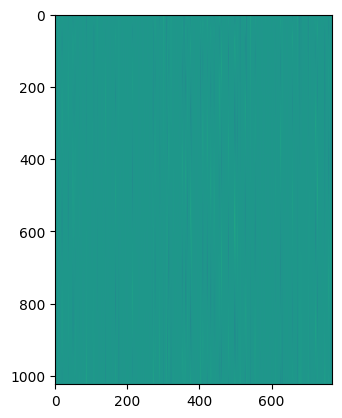

In [6]:
plt.imshow(sd_hf['transformer.wpe.weight'])

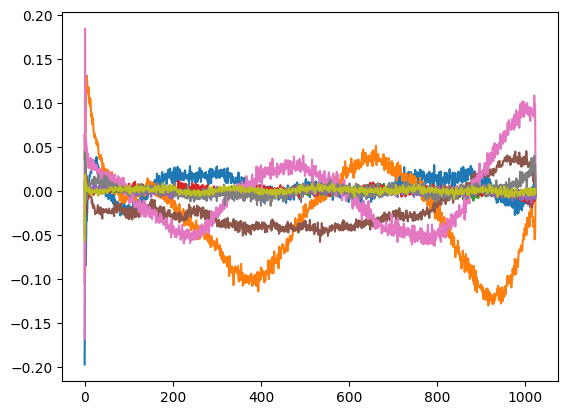

In [7]:
plt.plot(sd_hf['transformer.wpe.weight'][:,1:10])

In [8]:
from transformers import pipeline,set_seed
generator=pipeline(task='text-generation',model='gpt2')
set_seed(42)
generator('Hello I am a language model, ',max_length=30,num_return_sequences=5)

c:\Users\Wail.EL-BANI\AppData\Local\anaconda3\envs\cv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello I am a language model, \xa0the language model you see here is written in C. C++ is a language model, and so the'},
 {'generated_text': 'Hello I am a language model, \xa0therefore they had to come out before. What then are we done with the data?\xa0\nThat'},
 {'generated_text': "Hello I am a language model, \xa0and I know English has no such thing as a bad vocabulary as it's mostly Latin. I have to"},
 {'generated_text': 'Hello I am a language model, \xa0so I can easily write scripts and libraries for things like programming languages such as Java, Python, etc.'},
 {'generated_text': 'Hello I am a language model, \xa0I take for granted the limitations of the English-speaking world and the vast resources available to them. This'}]

In [9]:
import torch
import torch.nn as nn 
from torch.nn import functional as F


qkv=nn.Linear(10,3*100)

In [10]:
x=torch.rand(32,8,768)
B,T,C=x.shape

In [11]:
q=nn.Linear(768,100)

In [12]:
tril=torch.tril(torch.ones(10,10))
tril

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [13]:
a=torch.rand(5,5)
a

tensor([[4.4166e-01, 1.3251e-01, 8.3596e-01, 2.9931e-01, 6.5565e-01],
        [6.4513e-01, 8.6855e-01, 4.7999e-01, 3.8493e-01, 7.0366e-01],
        [1.8301e-01, 4.4956e-01, 1.3534e-01, 6.8188e-04, 2.5986e-01],
        [9.3625e-01, 6.4968e-02, 2.9674e-02, 9.1742e-01, 6.5659e-01],
        [4.6452e-01, 8.7058e-01, 8.7803e-01, 3.9555e-01, 3.9488e-01]])

In [14]:
masked_a=a.masked_fill(tril[:5,:5]==0,float('-inf'))
F.softmax(masked_a,dim=1)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4444, 0.5556, 0.0000, 0.0000, 0.0000],
        [0.3069, 0.4006, 0.2926, 0.0000, 0.0000],
        [0.3567, 0.1492, 0.1441, 0.3500, 0.0000],
        [0.1701, 0.2553, 0.2572, 0.1588, 0.1587]])

In [16]:
torch.arange(3)

tensor([0, 1, 2])

In [21]:
a=torch.rand(32,8,300)
B,T,C=a.size()
b=torch.rand(8,300)

In [23]:
(a+b).shape

torch.Size([32, 8, 300])

In [48]:
torch.randint(1,10,(8,),)

tensor([9, 1, 9, 1, 2, 3, 2, 9])

In [57]:
l=torch.rand(2,5)
l

tensor([[0.1059, 0.1059, 0.2144, 0.3963, 0.1748],
        [0.4853, 0.7132, 0.0121, 0.0667, 0.6731]])

In [62]:
l.mean(1)

tensor([0.1995, 0.3901])

In [63]:
l.std(1)

tensor([0.1195, 0.3320])

In [3]:
import tiktoken
import torch
bpe_tokenizer = tiktoken.get_encoding("gpt2")

# Encode a string into tokens (token ids)
def encode_text(text):
    return bpe_tokenizer.encode(text)

# Decode tokens back into a string
def decode_tokens(tokens):
    return bpe_tokenizer.decode(tokens)



In [6]:
text="hello everyone my name is gpt2"

x=torch.tensor(encode_text(text),dtype=torch.long)
decode_tokens(x.tolist())

'hello everyone my name is gpt2'

In [10]:
x.unsqueeze(0).size()

torch.Size([1, 8])

In [44]:
x=torch.ones(5,8)
# x=x.unsqueeze(0).repeat(1,1,2)
x.shape

torch.Size([5, 8])